#Imports and Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


#Loading the Dataset

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


#Preprocessing the Data

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)


#Building the Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(metadata.features['label'].num_classes)
])


# **Compiling the Model**

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


#Training the Model

In [18]:
history = model.fit(train.batch(32),
                    epochs=20,
                    validation_data=validation.batch(32))


Epoch 1/20
92/92 [==============================] - 268s 3s/step - loss: 1.5225 - accuracy: 0.3811 - val_loss: 1.1427 - val_accuracy: 0.5286
Epoch 2/20
92/92 [==============================] - 248s 3s/step - loss: 1.0310 - accuracy: 0.5903 - val_loss: 0.8929 - val_accuracy: 0.6540
Epoch 3/20
92/92 [==============================] - 247s 3s/step - loss: 0.8664 - accuracy: 0.6618 - val_loss: 0.7524 - val_accuracy: 0.7302
Epoch 4/20
92/92 [==============================] - 251s 3s/step - loss: 0.7435 - accuracy: 0.7139 - val_loss: 0.6459 - val_accuracy: 0.7766
Epoch 5/20
92/92 [==============================] - 251s 3s/step - loss: 0.6656 - accuracy: 0.7469 - val_loss: 0.5990 - val_accuracy: 0.7929
Epoch 6/20
92/92 [==============================] - 244s 3s/step - loss: 0.6230 - accuracy: 0.7633 - val_loss: 0.5506 - val_accuracy: 0.8174
Epoch 7/20
92/92 [==============================] - 254s 3s/step - loss: 0.5838 - accuracy: 0.7711 - val_loss: 0.5194 - val_accuracy: 0.8311
Epoch 8/20
92

KeyboardInterrupt: 

#Evaluating the Model

In [19]:
test_loss, test_accuracy = model.evaluate(test.batch(32))
print('Test accuracy:', test_accuracy)


12/12 [==============================] - 6s 546ms/step - loss: 0.3962 - accuracy: 0.8665
Test accuracy: 0.8664849996566772


#Vsualized Accuracy

1/1 [==============================] - 3s 3s/step


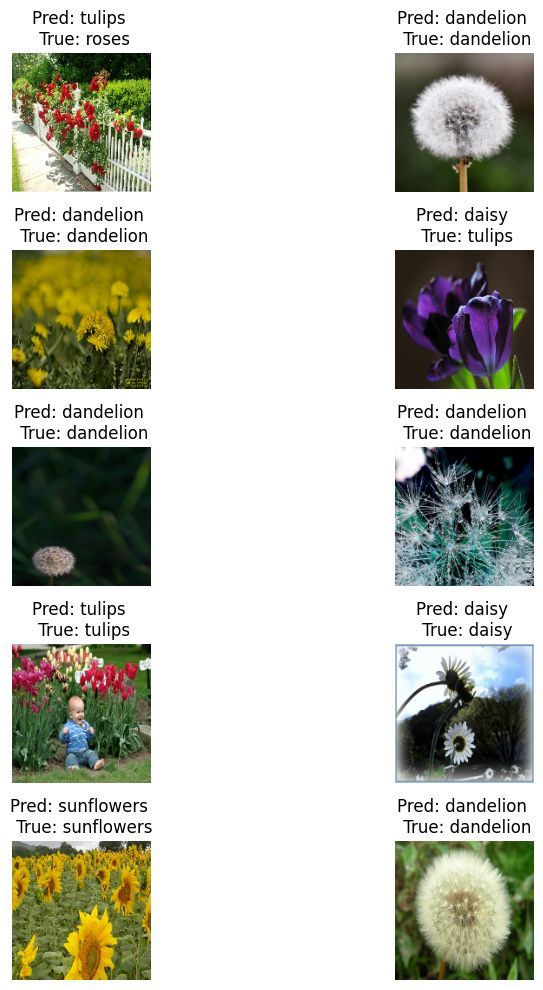

In [20]:
import numpy as np
for test_images, test_labels in test.batch(10).take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(test_images[i] * 0.5 + 0.5)
    plt.title("Pred: {} \n True: {}".format(
        metadata.features['label'].names[np.argmax(predictions[i])],
        metadata.features['label'].names[test_labels[i]]))
    plt.axis('off')

plt.tight_layout()
plt.show()
